Epoch 1/10
300/300 - 3s - loss: 0.2627 - accuracy: 0.9264 - val_loss: 0.0786 - val_accuracy: 0.9764 - 3s/epoch - 11ms/step
Epoch 2/10
300/300 - 1s - loss: 0.0630 - accuracy: 0.9803 - val_loss: 0.0442 - val_accuracy: 0.9863 - 1s/epoch - 5ms/step
Epoch 3/10
300/300 - 1s - loss: 0.0444 - accuracy: 0.9867 - val_loss: 0.0354 - val_accuracy: 0.9890 - 1s/epoch - 5ms/step
Epoch 4/10
300/300 - 2s - loss: 0.0343 - accuracy: 0.9897 - val_loss: 0.0365 - val_accuracy: 0.9884 - 2s/epoch - 7ms/step
Epoch 5/10
300/300 - 2s - loss: 0.0278 - accuracy: 0.9916 - val_loss: 0.0298 - val_accuracy: 0.9899 - 2s/epoch - 5ms/step
Epoch 6/10
300/300 - 1s - loss: 0.0214 - accuracy: 0.9934 - val_loss: 0.0302 - val_accuracy: 0.9894 - 1s/epoch - 5ms/step
Epoch 7/10
300/300 - 1s - loss: 0.0180 - accuracy: 0.9942 - val_loss: 0.0257 - val_accuracy: 0.9912 - 1s/epoch - 5ms/step
Epoch 8/10
300/300 - 1s - loss: 0.0146 - accuracy: 0.9951 - val_loss: 0.0354 - val_accuracy: 0.9888 - 1s/epoch - 5ms/step
Epoch 9/10
300/300 - 1s

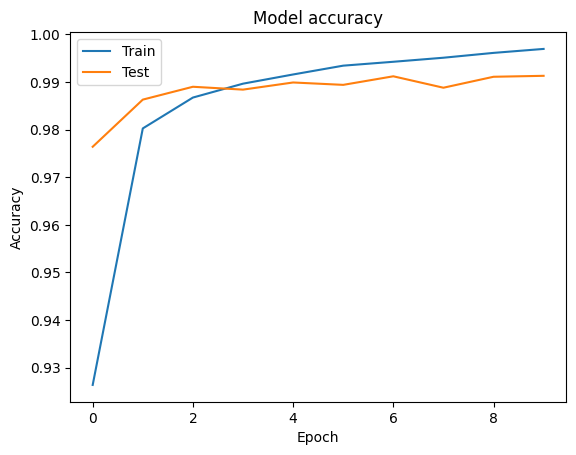

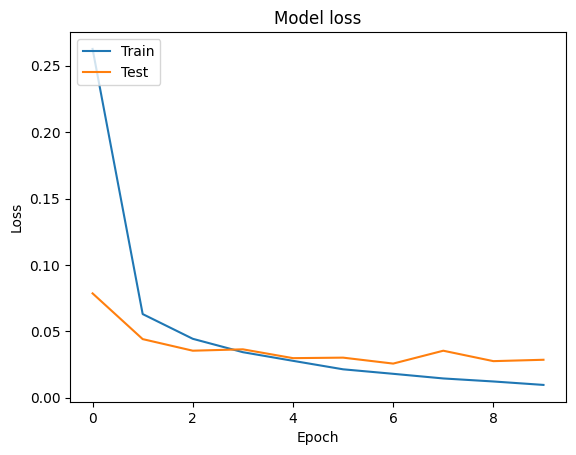

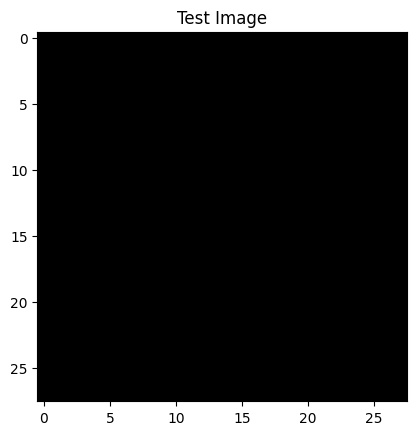

1/1 [==============================] - 0s 88ms/step
Predicted Digit: 1


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


test_image = np.zeros((28, 28))
test_image[4:24, 20:18] = 255

plt.imshow(test_image, cmap='gray')
plt.title('Test Image')
plt.show()

test_image = test_image.reshape(1, 28, 28, 1).astype('float32') / 255


prediction = model.predict(test_image)
predicted_digit = np.argmax(prediction)

print(f'Predicted Digit: {predicted_digit}')


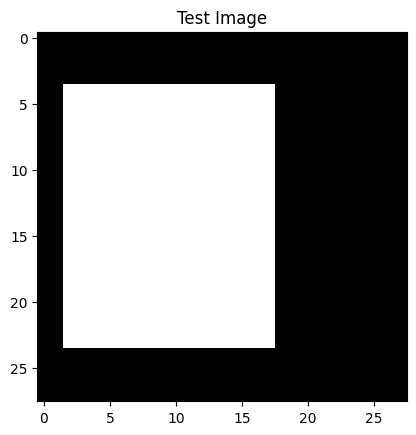

1/1 [==============================] - 0s 24ms/step
Predicted Digit: 0


In [8]:
test_image = np.zeros((28, 28))
test_image[4:24, 2:18] = 255

plt.imshow(test_image, cmap='gray')
plt.title('Test Image')
plt.show()

test_image = test_image.reshape(1, 28, 28, 1).astype('float32') / 255


prediction = model.predict(test_image)
predicted_digit = np.argmax(prediction)

print(f'Predicted Digit: {predicted_digit}')

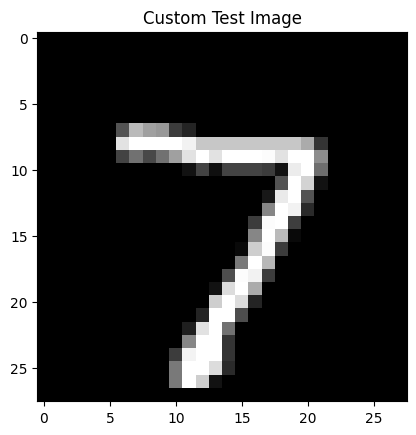

1/1 [==============================] - 0s 32ms/step
Predicted Digit: 7


In [9]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

custom_image_path = 'digit_data.png'
custom_image = load_img(custom_image_path, color_mode='grayscale', target_size=(28, 28))

custom_image = img_to_array(custom_image)
custom_image = custom_image.reshape(1, 28, 28, 1).astype('float32') / 255

plt.imshow(custom_image.reshape(28, 28), cmap='gray')
plt.title('Custom Test Image')
plt.show()

prediction = model.predict(custom_image)
predicted_digit = np.argmax(prediction)

print(f'Predicted Digit: {predicted_digit}')
